<a href="https://colab.research.google.com/github/Pedro-Boechat/periodo1trainee/blob/main/periodo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('/content/co2_emission.csv')
df.shape

(20853, 4)

In [37]:
df.fillna('Não há', inplace=True)

# Estudaremos os dados de 2017 e de 1970 para avaliar a evolução da emissão de carbono no mundo durante este período de 47 anos.

## Ano de 2017

Vamos analisar os dados para o ano de 2017, que é o mais recente do dataset

In [23]:
di = df[df['Year']==2017]
di.drop(di[di['Entity'] =='World'].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
media = di['Annual CO₂ emissions (tonnes )'].mean()
print(f'A média de emissão por entidade em 2017 é: {media} toneladas')

maximo = di['Annual CO₂ emissions (tonnes )'].max()
maximo_pais = di['Annual CO₂ emissions (tonnes )'].idxmax()
maior_pais = di['Entity'][maximo_pais]
print(f'A entidade com maior emissão de CO2 em 2017 é: {maior_pais}')

minimo = di['Annual CO₂ emissions (tonnes )'].min()
minimo_pais = di['Annual CO₂ emissions (tonnes )'].idxmin()
menor_pais = di['Entity'][minimo_pais]
print(f'A entidade com menor emissão de CO2 em 2017 é: {menor_pais}')

A média de emissão por entidade em 2017 é: 241264656.94493213 toneladas
A entidade com maior emissão de CO2 em 2017 é: China
A entidade com menor emissão de CO2 em 2017 é: Saint Helena


In [25]:
top5 = di.sort_values(by=['Annual CO₂ emissions (tonnes )'], ascending=False).head(8)
paisesmax = top5['Entity'].to_list()
print(f'As 8 entidades com maior emissão de CO2 em 2017 são: {paisesmax}')

As 8 entidades com maior emissão de CO2 em 2017 são: ['China', 'United States', 'Asia and Pacific (other)', 'EU-28', 'Middle East', 'India', 'Americas (other)', 'Europe (other)']


In [26]:
min5 = di.sort_values(by=['Annual CO₂ emissions (tonnes )']).head(8)
paisesmin = min5['Entity'].to_list()
print(f'As 8 entidades com menor emissão de CO2 em 2017 são: {paisesmin}')

As 8 entidades com menor emissão de CO2 em 2017 são: ['Saint Helena', 'Niue', 'Tuvalu', 'Wallis and Futuna Islands', 'Montserrat', 'Nauru', 'Kiribati', 'Saint Pierre and Miquelon']


## Ano de 1970

Vamos analisar como era o cenário de emissão de carbono em 1970 (50 anos atrás).

In [27]:
di = df[df['Year']==1970]
di.drop(di[di['Entity'] =='World'].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
media = di['Annual CO₂ emissions (tonnes )'].mean()
print(f'A média de emissão por entidade em 1970 era: {media} toneladas')

maximo = di['Annual CO₂ emissions (tonnes )'].max()
maximo_pais = di['Annual CO₂ emissions (tonnes )'].idxmax()
maior_pais = di['Entity'][maximo_pais]
print(f'A entidade com maior emissão de CO2 em 1970 era: {maior_pais}')

minimo = di['Annual CO₂ emissions (tonnes )'].min()
minimo_pais = di['Annual CO₂ emissions (tonnes )'].idxmin()
menor_pais = di['Entity'][minimo_pais]
print(f'A entidade com menor emissão de CO2 em 1970 era: {menor_pais}')

A média de emissão por entidade em 1970 era: 113325018.71596244 toneladas
A entidade com maior emissão de CO2 em 1970 era: United States
A entidade com menor emissão de CO2 em 1970 era: Kyrgysztan


In [29]:
top5 = di.sort_values(by=['Annual CO₂ emissions (tonnes )'], ascending=False).head(8)
paisesmax_antigo = top5['Entity'].to_list()
print(f'As 8 entidades com maior emissão de CO2 em 1970 eram: {paisesmax_antigo}')

As 8 entidades com maior emissão de CO2 em 1970 eram: ['United States', 'EU-28', 'Europe (other)', 'Asia and Pacific (other)', 'Russia', 'Germany', 'Americas (other)', 'China']


In [30]:
min5 = di.sort_values(by=['Annual CO₂ emissions (tonnes )']).head(8)
paisesmin_antigo = min5['Entity'].to_list()
print(f'As 8 entidades com menor emissão de CO2 em 1970 eram: {paisesmin_antigo}')

As 8 entidades com menor emissão de CO2 em 1970 eram: ['Kyrgysztan', 'Moldova', 'Niue', 'Bhutan', 'Cook Islands', 'Falkland Islands', 'Sao Tome and Principe', 'Montserrat']


Nota-se um grande aumento de emissão de carbono pela China num intervalo de tempo assaz curto, o que pode ser verificado no gráfico mais abaixo desta página.

# Correlação entre Ano e Emissão

In [31]:
correlacoes = np.zeros(8)
a = 0
for i in paisesmax:
  du = df[df['Entity']==i]
  correlacao = du['Annual CO₂ emissions (tonnes )'].corr(du['Year'])
  correlacoes[a] = (correlacao)
  a += 1

media_c = np.mean(correlacoes)
print(media_c)


0.7257008385482469


Identificamos uma forte correlação entre ano e emissão de carbono. Esse dado indica que, para entidades que mais emitem carbono, quanto mais o tempo passou, maior foi a emissão de carbono.

Isto está alinhado com a intuição, uma vez que as emissões de carbono em países desenvolvidos têm aumentado cada vez mais desde as revoluções industriais.

In [32]:
correlacoes = np.zeros(8)
a = 0
for i in paisesmin:
  du = df[df['Entity']==i]
  correlacao = du['Annual CO₂ emissions (tonnes )'].corr(du['Year'])
  correlacoes[a] = (correlacao)
  a += 1

media_c = np.mean(correlacoes)
print(media_c)

0.5633477220941376


Essa correlação é intermediária, o que indica que a evolução industrial nessas entidades não foi relevante o suficiente para que as emissões fossem consideravelmente elevadas com o passar dos anos.

# Gráficos

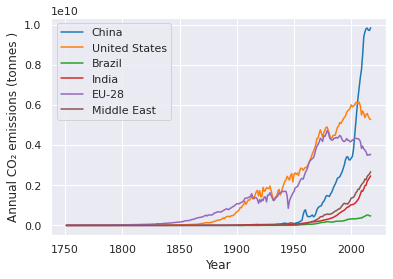

In [33]:
# Para acompanhar a evolução da emissão de entidades relevantes

sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1)
paises = ['China', 'United States', 'Brazil', 'India', 'EU-28', 'Middle East']
for i in paises:
  data = df[df['Entity']==i]
  ax = sns.lineplot(x=data['Year'],y=data['Annual CO₂ emissions (tonnes )'])
plt.xticks(rotation=0)
plt.legend(labels=paises)

Notamos por meio deste gráfico que a Europa e Estados Unidos têm buscado reduzir suas emissões de carbono nos últimos anos, ao contrário da China, que vêm em constante e acentuado aumento de emissões.

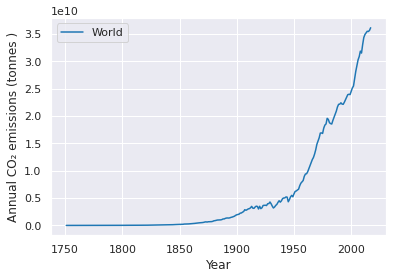

In [34]:
# Acompanhar a evolução da emissão no mundo

dw = df[df['Entity']=='World']
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1)
ax = sns.lineplot(x=dw['Year'],y=dw['Annual CO₂ emissions (tonnes )'])
plt.xticks(rotation=0)
plt.legend(labels=['World'])

# Normalizando e ordenando

A fim de facilitar a visualização dos dados de emissão, vou normalizá-los:

In [35]:
df.drop(df[df['Entity'] =='World'].index, inplace = True)
df['Annual CO₂ emissions (tonnes )']=(df['Annual CO₂ emissions (tonnes )']-df['Annual CO₂ emissions (tonnes )'].min())/(df['Annual CO₂ emissions (tonnes )'].max()-df['Annual CO₂ emissions (tonnes )'].min())

Deixando o dataframe ordenado da maior emissão à menor, no ano de 2017

In [36]:
di = df[df['Year']==2017]
di.sort_values(by='Annual CO₂ emissions (tonnes )', inplace=True, ascending=False)
di

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Entity,Code,Year,Annual CO₂ emissions (tonnes )
4484,China,CHN,2017,1.000000
19927,United States,USA,2017,0.563350
1517,Asia and Pacific (other),Não há,2017,0.544393
6090,EU-28,Não há,2017,0.398423
12735,Middle East,Não há,2017,0.315116
...,...,...,...,...
12977,Montserrat,MSR,2017,0.059782
20352,Wallis and Futuna Islands,Não há,2017,0.059779
14064,Niue,NIU,2017,0.059778
19207,Tuvalu,TUV,2017,0.059778
